In [2]:

# load the modules
from los_core import DREAMS_MASTERSHEET
#multiples outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from re import sub
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from plotnine import *

pipo = list(DREAMS_MASTERSHEET.agyw_period_range.unique())
pipo.append("Total")
sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])
sorted(pipo)

['0-6 months', '07-12 months', '13-24 months', '25+ months', 'Total']

# Indicator

In [3]:
class AgywPrev:
    """A class with properties and methods given the results of the indicator AGYW_PREV DATIM""" 
    __who_am_I ="DATIM"
    __datim1_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package."
    __datim2_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service."
    __datim3_title="Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services."
    
    def __repr__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    @classmethod
    def datim_titleI(cls):
        return cls.__datim1_title
    
    @classmethod
    def datim_titleII(cls):
        return cls.__datim2_title
    
    @classmethod
    def datim_titleIII(cls):
        return cls.__datim3_title
    
    
    def __init__(self,commune=None):
        self.__commune = commune
        self.__i_am = f"{AgywPrev.__who_am_I}"
        self.__data =  DREAMS_MASTERSHEET
        self. __total_mastersheet = self.__data.code.count()
        if self.__commune == None:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")]
        else:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")&(self.__data.actual_commune == f"{self.__commune}")]
        self.__total_dreams_valid = self.__dreams_valid.code.count()
        self.__dreams_valid["primary_only"] = self.__dreams_valid.apply(lambda df: self.__primFunc(df),axis=1)
        self.__dreams_valid["primary_and_OneSecondary_services"] = self.__dreams_valid.apply(lambda df: self.__primLeastOneSecFunc(df),axis=1)
        self.__dreams_valid["partial_primary_services"] = self.__dreams_valid.apply(lambda df: self.__primPartFunc(df),axis=1)
        self.__agyw_prevI = self.__dreams_valid[self.__dreams_valid.primary_only == "full_primary_only"]
        self.__agyw_prevII = self.__dreams_valid[self.__dreams_valid.primary_and_OneSecondary_services == "full_primary_leastOneSecondary"]
        self.__agyw_prevIII = self.__dreams_valid[self.__dreams_valid.partial_primary_services == "primary_part_services"]  
        self.__agyw_prevI_total = self.__agyw_prevI.code.count()
        self.__agyw_prevII_total = self.__agyw_prevII.code.count()
        self.__agyw_prevIII_total = self.__agyw_prevIII.code.count()
        self.__total_datim = self.__agyw_prevI_total + self.__agyw_prevII_total + self.__agyw_prevIII_total
        
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    @property
    def data_mastersheet(self):
        return self.__data
    
    @property
    def data_dreams_valid(self):
        return self.__dreams_valid

    @property
    def total_mastersheet(self):
        return self.__total_mastersheet

    @property
    def total_dreams_valid(self):
        return self.__total_dreams_valid
    
    def __primFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.condoms == "errata" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        #if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.init_prep=="errata" and df.new_condoms == "no" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ): 
            return "full_primary_only"
        elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        #elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        elif (df.ps_20_24 == "condoms&hts&curriculum"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        #elif (df.ps_20_24 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        else:
            return "invalid"
    
    def __primLeastOneSecFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date"  or df.condoms == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        #if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.new_condoms == "sensOuRecu" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        #elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_20_24 == "condoms&hts&curriculum") and (df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        #elif (df.ps_20_24 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date"  or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        else:
            return "invalid"
        
    def __primPartFunc(self,df):
        if (df.age_range == "15-19") and ((df.condoms == "tested_on_given_date" and df.dreams_curriculum == "curriculum_inc") or (df.condoms == "errata" and df.dreams_curriculum == "curriculum_completed")): 
        #if (df.age_range == "15-19") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")): 
            return "primary_part_services"
        elif (df.age_range == "20-24") and ((df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="tested_on_given_date")):
        #elif (df.age_range == "20-24") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")):
            return "primary_part_services"
        else:
            return "invalid"
         
    @property
    def total_datimI(self):
        return self.__agyw_prevI_total
    
    @property
    def total_datimII(self):
        return self.__agyw_prevII_total
    
    @property
    def total_datimIII(self):
        return self.__agyw_prevIII_total
    
    @property
    def total_datim_general(self):
        return self.__total_datim
    
    @property
    def data_agyw_prevI(self):
        return self.__agyw_prevI

    @property
    def data_agyw_prevII(self):
        return self.__agyw_prevII

    @property
    def data_agyw_prevIII(self):
        return self.__agyw_prevIII

    __PERIOD_DATIM = sorted(list(DREAMS_MASTERSHEET.agyw_period_range.unique()))
    __PERIOD_DATIM.append("Total")
    __AGE_DATIM = sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])
    def datim_agyw_prevI(self):
        
        try:
            pivotableI = self.__agyw_prevI.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevI_pivot = pivotableI.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotI = list(agyw_prevI_pivot.columns)
            indexes_pivotI = list(agyw_prevI_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotI:
                    agyw_prevI_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotI:
                    agyw_prevI_pivot.loc[age] = 0
            agyw_prevI_pivot = agyw_prevI_pivot.reindex(index=AgywPrev.__AGE_DATIM, columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevI_pivot_final = agyw_prevI_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevI_results_final = DataFrame( agyw_prevI_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevI_results_final = DataFrame({"Age":["10-14","15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevI_results_final
    
    def datim_agyw_prevII(self):
        try:
            pivotableII = self.__agyw_prevII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevII_pivot = pivotableII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotII = list(agyw_prevII_pivot.columns)
            indexes_pivotII = list(agyw_prevII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotII:
                    agyw_prevII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotII:
                    agyw_prevII_pivot.loc[age] = 0
            agyw_prevII_pivot = agyw_prevII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)            
            agyw_prevII_pivot_final = agyw_prevII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevII_results_final = DataFrame( agyw_prevII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevII_results_final = DataFrame({"Age":["10-14", "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevII_results_final
    
    def datim_agyw_prevIII(self):
        try:
            pivotableIII = self.__agyw_prevIII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevIII_pivot = pivotableIII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIII_pivot.columns)
            indexes_pivotIII = list(agyw_prevIII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIII_pivot.loc[age] = 0
            agyw_prevIII_pivot = agyw_prevIII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIII_pivot_final = agyw_prevIII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIII_results_final = DataFrame( agyw_prevIII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIII_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIII_results_final

In [4]:
#%%capture
datim = AgywPrev()

<ipython-input-3-138747d03e18>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-3-138747d03e18>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-3-138747d03e18>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()

9234

2907

'DATIM'

175

28

513

716

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,151,0,0,151
1,15-19,0,23,0,0,23
2,20-24,0,1,0,0,1


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,20,0,0,20
1,15-19,0,8,0,0,8
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,77,244,0,0,321
2,20-24,71,121,0,0,192


# Indicator Communes

In [6]:
class AgywPrevCommune(AgywPrev):
    """A class that extend AgywPrev with the purpose of the indicator AGYW_PREV DATIM by commune"""
    __who_am_I ="DATIM"
    def __init__(self,name):
        self.__name = name
        self.__i_am = f"{AgywPrevCommune.__who_am_I} {self.__name}"
        #self.__data =  DREAMS_MASTERSHEET
        super().__init__(self.__name)
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    def __repr__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
      
        
    
        

DREAMS_MASTERSHEET.actual_commune.unique()

        

array(['Verrettes', 'Delmas', 'Port-au-Prince', 'Carrefour', 'Limonade',
       'Plaine-du-Nord', 'Cap-Haïtien', 'Kenscoff', 'Dessalines',
       'Pétionville', 'Milot', 'Quartier-Morin', 'La Chapelle',
       'Gressier', 'Saint-Marc', "Petite Rivière de l'Artibonite",
       'Grande Saline', 'Liancourt', 'Tabarre', 'Montrouis', 'Desdunes'],
      dtype=object)

In [7]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in DREAMS_MASTERSHEET.actual_commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))
   

In [8]:
for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  print(" ")
  print(" ")
  print(" ")
  print(" ")

9234

59

'DATIM Verrettes'

3

0

5

8

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,2,0,0,2
1,15-19,0,1,0,0,1
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,2,0,0,0,2
2,20-24,2,1,0,0,3


9234

43

'DATIM Delmas'

0

1

3

4

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,1,0,0,1
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,2,1,0,0,3


9234

508

'DATIM Port-au-Prince'

30

2

173

205

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,30,0,0,30
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,2,0,0,2
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,4,103,0,0,107
2,20-24,1,65,0,0,66


9234

204

'DATIM Carrefour'

4

1

76

81

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,4,0,0,4
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,1,46,0,0,47
2,20-24,0,29,0,0,29


9234

140

'DATIM Limonade'

0

0

22

22

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,12,4,0,0,16
2,20-24,6,0,0,0,6


9234

168

'DATIM Plaine-du-Nord'

1

1

8

10

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,5,0,0,5
2,20-24,3,0,0,0,3


9234

327

'DATIM Cap-Haïtien'

7

2

24

33

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,7,0,0,7
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,2,0,0,2
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,1,14,0,0,15
2,20-24,4,5,0,0,9


9234

464

'DATIM Kenscoff'

105

17

104

226

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,83,0,0,83
1,15-19,0,21,0,0,21
2,20-24,0,1,0,0,1


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,12,0,0,12
1,15-19,0,5,0,0,5
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,21,48,0,0,69
2,20-24,20,15,0,0,35


9234

182

'DATIM Dessalines'

22

2

36

60

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,21,0,0,21
1,15-19,0,1,0,0,1
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,1,0,0,1
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,11,20,0,0,31
2,20-24,2,3,0,0,5


9234

47

'DATIM Pétionville'

1

0

4

5

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,1,1,0,0,2
2,20-24,1,1,0,0,2


9234

100

'DATIM Milot'

0

0

1

1

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,1,0,0,1
2,20-24,0,0,0,0,0


9234

83

'DATIM Quartier-Morin'

0

0

0

0

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


9234

72

'DATIM La Chapelle'

0

0

0

0

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


9234

168

'DATIM Gressier'

1

0

12

13

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,2,0,0,0,2
2,20-24,9,1,0,0,10


9234

72

'DATIM Saint-Marc'

0

0

8

8

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,4,0,0,0,4
2,20-24,4,0,0,0,4


9234

118

"DATIM Petite Rivière de l'Artibonite"

0

0

20

20

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,11,1,0,0,12
2,20-24,8,0,0,0,8


9234

94

'DATIM Grande Saline'

1

0

6

7

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,1,1,0,0,2
2,20-24,4,0,0,0,4


9234

6

'DATIM Liancourt'

0

1

4

5

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,1,0,0,1
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,3,0,0,0,3
2,20-24,1,0,0,0,1


9234

39

'DATIM Tabarre'

0

1

4

5

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,0,0,1
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,1,0,0,0,1
2,20-24,3,0,0,0,3


9234

2

'DATIM Montrouis'

0

0

2

2

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,2,0,0,0,2
2,20-24,0,0,0,0,0


9234

11

'DATIM Desdunes'

0

0

1

1

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,1,0,0,0,1


# Graphes

datim.total_datim_general
target= 18000

data_plot = pd.DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

NameError: name 'data_plot' is not defined

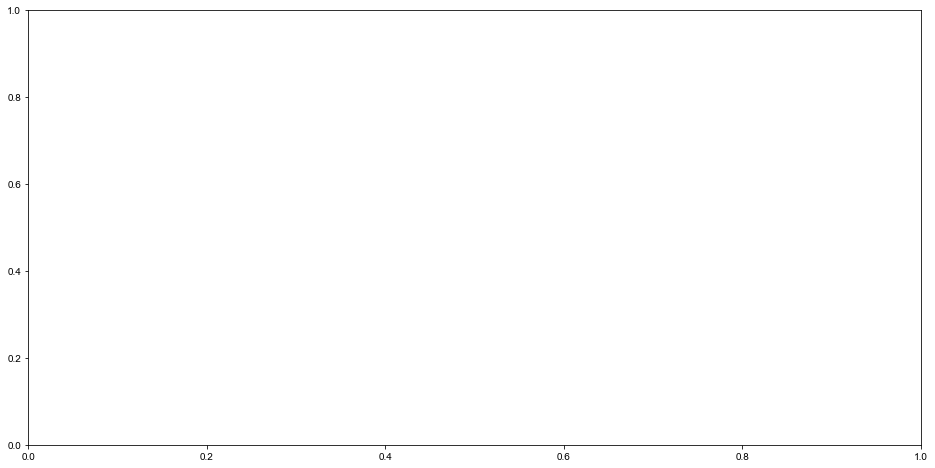

In [9]:
plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution_core",dpi=1000)

In [ ]:
stack_data = pd.DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur"],
                        "label": ["target","composante I","composante II","composante III"],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII]
                  })

stack_data


In [ ]:
p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev_core.png",dpi=1000)